# Lab 4: Deep Learning with PyTorch

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

## Torch tensors
Whereas we have been using numpy arrays and pandas dataframes for most of the course, PyTorch (we'll often say Torch for simplicity) uses tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are multi-dimensional arrays, and very similar to NumPy's ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. Tensors are stored on a `device`, like a cpu or gpu.

### Initialization
You can create tensors from existing lists, arrays, or a range of existing initializers.

In [130]:
# List to Tensor
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# Initialize with a given shape
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)   


print(f"From list Tensor: \n {x_data} \n")
print(f"From Numpy: \n {x_np} \n")
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")



From list Tensor: 
 tensor([[1, 2],
        [3, 4]]) 

From Numpy: 
 tensor([[2, 3],
        [4, 5]]) 

Random Tensor: 
 tensor([[0.8198, 0.0478, 0.7498],
        [0.6468, 0.5690, 0.9527]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


You can move between Numpy arrays and tensors in both directions. 
Careful: if your tensor is stored on cpu, it will point to the same object in memory as the Numpy array, and changing one will change the other.

In [131]:
# Numpy to Tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor original: \n {x_np} \n")

# Tensor to Numpy
np_array = x_np.numpy()

# Change the tensor
x_np.add_(1) # The underscore _ means that the operation is done in place
print(f"Tensor changed: \n {x_np} \n")
print(f"Numpy array has also changed: \n {np_array} \n")



Tensor original: 
 tensor([[1, 2],
        [3, 4]]) 

Tensor changed: 
 tensor([[2, 3],
        [4, 5]]) 

Numpy array has also changed: 
 [[2 3]
 [4 5]] 



### Attributes
You can query a tensor's shape, datatype, and device.

In [132]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Switching to GPU
You can move the tensor to the GPU using the .to method.

In [133]:
# We move our tensor to the GPU if available
# For CUDA-based systems
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  device = torch.device('cuda:0')
  print(f"Device tensor is stored on: {tensor.device}")

# For Mac M1/M4-based systems
if torch.backends.mps.is_available():
  device = torch.device("mps")
  tensor = tensor.to(device)

print(f"Tensor is stored on device: {tensor.device}")

Tensor is stored on device: mps:0


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
If your laptop has a GPU, we strongly recommend that you figure out how to use it. 

For **Windows** machines, you probably need to <a href="https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/">install CUDA</a>. 

For **Macs** with M1/M4 chips, it should work out of the box.</p>

If you're using **Colab**, allocate a GPU by going to Edit \> Notebook Settings. 
At the time of writing, T4 GPUs are free to use, and fine for doing the labs. Better GPUs like the A100 will consume credits. On the top right, click the down arrow and then 'View resources'.

For large-scale experiments, see the guide on using the **Snellius Supercomputer** using your course credits.


### Tensor operations
There are over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, and random sampling. Since you are already familiar with the Numpy API, you'll find these very familiar. See 
[here](https://pytorch.org/docs/stable/torch.html) for a full list of tensor operations.


In [134]:
# Indexing and slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [135]:
# Joining
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [136]:
# Matrix multiplication (matmul)
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## Neural Network training (backpropagation)
As a reminder, training a neural network (NN) is a series of functions (e.g. matrix multiplications, activation functions, softmax operations), many of which have parameters (model weights and biases) that define the exact output. Training 
typically occurs in two steps:

**Forward Propagation**: The NN runs the input data through each of its
functions to make its best guess about the correct output. After this, we compute compute the error (loss).

**Backward Propagation**: In backprop, the NN adjusts its parameters
proportionate to the error in its guess. It does this by traversing
backwards from the output, collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), and optimizing
the parameters using gradient descent. For a more detailed walkthrough
of backprop, check out [this](https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) and [this](https://www.youtube.com/watch?v=tIeHLnjs5U8) video from 3Blue1Brown.

To illustrate how this works, we'll start from a pretrained resnet18 model. We create a random 64x64 input image and feed it to the network.
Note: this example only works on CPU.

In [137]:
# Import a pretrained model and its weights
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Create a random input. The model expects a 4D tensor.
# The first dimension is the batch size (1), the second is the number of channels (red-green-blue),
# and the last two are the height and width of the input.
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

**Forward pass**: simply feed the input to the model to get its predictions.
Then, based on the predictions, we can compute the loss.

In [138]:
prediction = model(data) # forward pass

loss_fn = torch.nn.MSELoss() # Mean Squared Error loss (we'll discuss torch.nn in more detail later)
loss = loss_fn(prediction, labels) # this returns a Tensor

**Backward pass**  
Step 1: Compute the gradients by calling `.backward()`. PyTorch’s _autograd_ engine will calculate and store the gradients for each model parameter (in the parameter’s `.grad` attribute).

There is a lot going on in the background. In short, every time you perform a forward pass, PyTorch dynamically constructs a _computational graph_ that tracks tensors and operations involved in computing gradients. When you call `.backward()`, PyTorch traverses this graph in reverse to compute all gradients efficiently using a process called _automatic differentiation_. To optimize computation, PyTorch stores intermediate values needed for gradient calculation while applying the chain rule. Once `backward()` completes, the computational graph is discarded to free memory, unless `retain_graph=True` is specified. This means you can modify the model’s structure (e.g., shape, size, and operations) at every iteration.


In [139]:
loss.backward() # backward pass

It's important to understand that `loss` is a Tensor, and in PyTorch, every tensor that results from an operation is also a node in the computational graph (at least if it has the property `requires_grad=True`). Hence, `loss` is the last node in the computational graph, and by calling `backward`, PyTorch will traverse the graph backwards and attach all the gradients to all the (learnable) tensors it encounters. We will visualize the computational graph below (ResNet has a huge graph).

In [140]:
loss

tensor(1.0548, grad_fn=<MseLossBackward0>)

Step 2: Choose an optimizer (e.g. stochastic gradient descent) and its hyperparameters (e.g. learning rate). Then do one `.step()` with the optimizer to update the model weigths.

The expression model.parameters() in PyTorch returns an iterator over all learnable parameters (weights and biases) of the model (i.e., tensors with requires_grad=True). When we ran `backward()` we added the gradients to the parameters, and the optimizer will use these gradients to update the parameters when we run `step`.


In [141]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step() #gradient descent


**Recap.** One training cycle thus consists of these simple commands, and now you also understand how they work.

In [142]:
prediction = model(data) # forward pass
loss = loss_fn(prediction, labels) # compute loss
loss.backward() # backward pass (compute all gradients)
optim.step() # update model weigths

## Building Neural Networks
It's now time to build a complete NN. This can be done via the `torch.nn` package, which contains a lot of components (e.g. layers such as `nn.Conv2d`) and the `torch.nn.functional` module which contains functions such as `relu` and `max_pool`.

Defining a NN works buy defining a Python class:
* Create a subclass of `nn.Module`.
* In the `__init__` method, define the components that you will use and their hyperparameters.
* In the `forward` method, define the structure of the network. Pass the input to the required functions and layers, store the result in a variable, and pass it to the next function.

For example, let's implement the convolutional network (LeNet) in the image below
![convnet](https://pytorch.org/tutorials/_static/img/mnist.png)


In [143]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels (filters), 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6 input channels, 16 output channels (filters), 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layers. 
        # After flattening the conv2 output, we get a vector of 16 * 5 * 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 120 hidden nodes
        self.fc2 = nn.Linear(120, 84) # 84 hidden nodes
        self.fc3 = nn.Linear(84, 10) # 10 output nodes (classes)

    def forward(self, input):
        # Convolution layer: conv1 + RELU activation function
        # Outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Maxpooling (subsampling)) layer: 2x2 grid
        # This layer does not have any parameters, outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer: conv2 + RELU activation
        # Outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Maxpooling layer S4: 2x2 grid
        # Outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: outputs a (N, 400) Tensor (16*5*5)
        s4 = torch.flatten(s4, 1)
        # Fully connected layer + RELU activation
        # (N, 400) Tensor input, outputs a (N, 120) Tensor
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer + RELU activation
        # (N, 120) Tensor input, outputs a (N, 84) Tensor
        f6 = F.relu(self.fc2(f5))
        # Output layer:
        # (N, 84) Tensor input, outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Inspect the number of learnable parameters

In [144]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total learnable parameters: {num_params}")

Total learnable parameters: 11689512


Toy training data

In [145]:
input = torch.randn(1, 1, 32, 32) # random input image
target = torch.randn(10)  # a dummy target
target = target.view(1, -1)  # make it the same shape as output

**Forward pass**: Passing input through the network calls the `forward` method of the model, computing and returning the output of the network

In [146]:
out = net(input)
print(out)

tensor([[ 0.0680,  0.1161,  0.1356,  0.0478, -0.0487,  0.0056,  0.0863, -0.0201,
          0.0070, -0.0511]], grad_fn=<AddmmBackward0>)


**Compute loss**: same as before.

In [147]:
loss_fn = torch.nn.MSELoss() # Mean Squared Error loss
loss = loss_fn(out, target)
print(loss)

tensor(0.7658, grad_fn=<MseLossBackward0>)


You can run the code below to visualize the computational graph ending in `loss` (green box). It will show all the operations and the learnable model parameters in blue boxes (biases and weights in separate boxes).

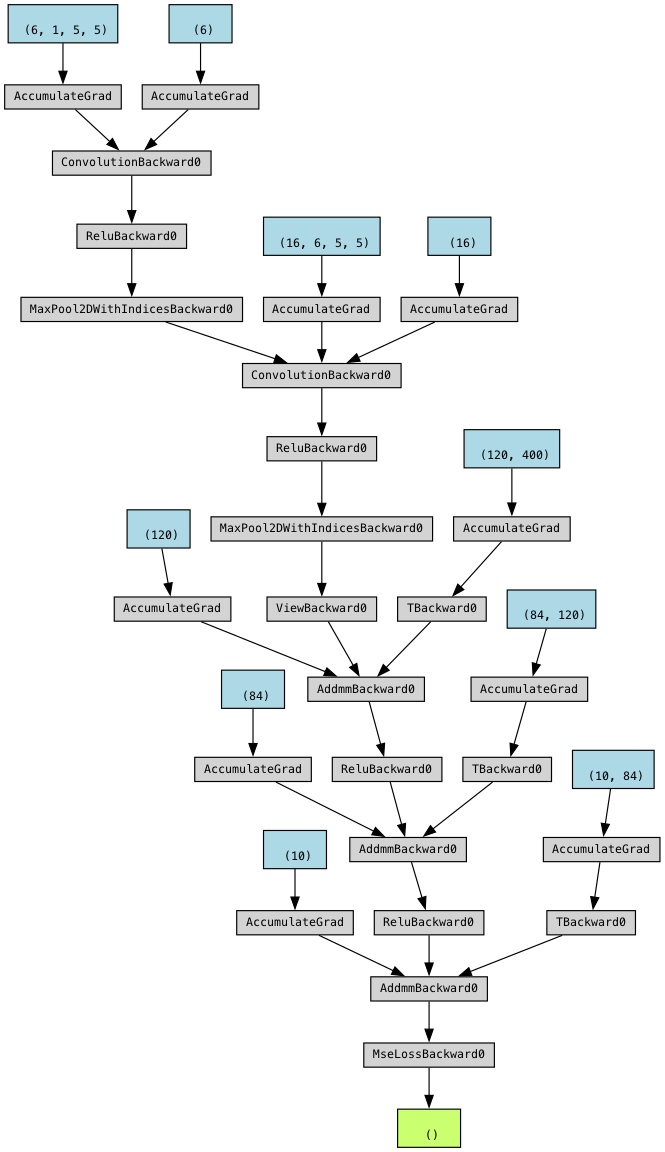

In [148]:
from torchviz import make_dot
graph = make_dot(loss, params=dict(model.named_parameters()))
graph.render("computational_graph", format="png", view=True)

# Display inside Jupyter Notebook
from IPython.display import Image
Image("computational_graph.png")

**Backward pass**. In PyTorch, you need to zero the gradients of all parameters before performing a new backward pass because gradients accumulate by default. This behavior is designed to support techniques like mini-batch gradient accumulation, but in standard training loops, failing to zero out the gradients can lead to incorrect updates.


In [149]:
net.zero_grad() # zeroes the gradient buffers of all parameters

print('Gradients of Conv1 biases, after zero_grad, before backward:', net.conv1.bias.grad)

loss.backward()

print('Gradients of Conv1 biases, after backward:', net.conv1.bias.grad)

Gradients of Conv1 biases, after zero_grad, before backward: None
Gradients of Conv1 biases, after backward: tensor([-0.0205, -0.0060, -0.0010, -0.0205, -0.0041, -0.0134])


**Optimizer step**: Create an SGD optimizer on the model parameters and do a step. Notice that the parameters have changed slightly.

In [150]:
optim = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)

print('Weights of Conv1 biases, before step:', net.conv1.bias)
optim.step() #gradient descent
print('Weights of Conv1 biases, after step:', net.conv1.bias)

Weights of Conv1 biases, before step: Parameter containing:
tensor([-0.1529, -0.0687, -0.1748,  0.1662, -0.1870,  0.1600],
       requires_grad=True)
Weights of Conv1 biases, after step: Parameter containing:
tensor([-0.1527, -0.0686, -0.1748,  0.1664, -0.1869,  0.1601],
       requires_grad=True)


## Training a classifier for CIFAR-10

We'll now do a complete training run on the CIFAR10 dataset. It has the classes:
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
'ship', 'truck'. The images in CIFAR-10 are of size 3x32x32, i.e.
3-channel color images of 32x32 pixels in size.

![cifar10](https://pytorch.org/tutorials/_static/img/cifar10.png)

### Loading the data
We can het the CIFAR10 datasets from `torchvision`, but since these are PILImage images, we'll need to transform them to Tensors first and normalize them. We'll also create a separate training and test set (using a predefined split). We'll also create data loaders that will return batches of 4 images at a time.


In [151]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let's peek at some of the images returned by our dataloader.

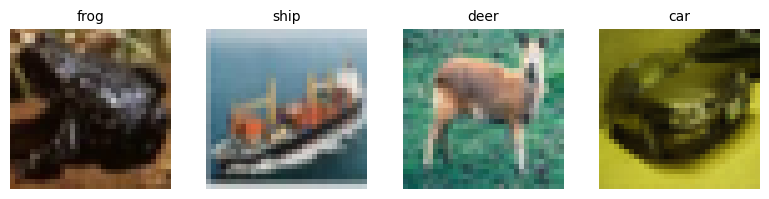

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show a batch of images with labels underneath
def show_images(images, labels, classes):
    images = images / 2 + 0.5  
    np_images = images.numpy()

    batch_size = len(images)  
    fig, axes = plt.subplots(1, batch_size, figsize=(batch_size * 2, 2)) 

    if batch_size == 1: 
        axes = [axes]

    for idx, ax in enumerate(axes):
        ax.imshow(np.transpose(np_images[idx], (1, 2, 0)))  # Convert (C, H, W) to (H, W, C)
        ax.set_title(classes[labels[idx]], fontsize=10)  # Set label as title
        ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images with class labels above
show_images(images, labels, classes)

### Create the neural network
We will re-create the network we had before, but now using 3-channel inputs since these are colored images. We'll also condense the code, as is often done. Check that it is still the same network.

In [153]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Sidenote: simple networks like this, which are a pure sequence of layers, can also be defined by the Sequential API, which is much simpler:

In [172]:
net_sequential = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6, 16, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.ReLU(),
    
    nn.Linear(120, 84),
    nn.ReLU(),
    
    nn.Linear(84, 10)
)

Put the network on GPU if possible. Note that when we train the network, we also need to put the data on the GPU.

In [154]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

We'll use cross-entropy loss and an SGD optimizer

In [155]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network
To train the network, we have to do all the steps we discussed before in a loop. Each iteration, we'll get a new batch of data from the dataloader, and we'll also repeat this for 2 epochs.

In [156]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # Put the data on GPU if possible
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.859
[1,  6000] loss: 1.694
[1,  8000] loss: 1.602
[1, 10000] loss: 1.564
[1, 12000] loss: 1.505
[2,  2000] loss: 1.421
[2,  4000] loss: 1.399
[2,  6000] loss: 1.373
[2,  8000] loss: 1.368
[2, 10000] loss: 1.324
[2, 12000] loss: 1.336
Finished Training


### Test the network
Let's see whether the model makes good predictions. We'll take some examples from out test set loader.

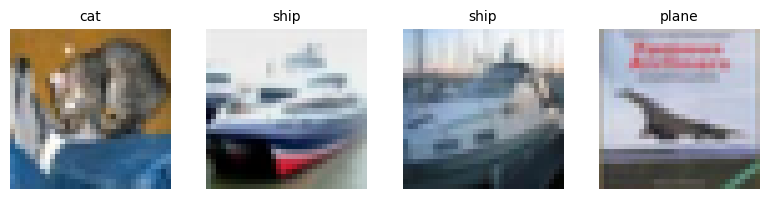

In [157]:
# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
show_images(images, labels, classes)

Get the outputs from the trained model

In [159]:
outputs = net(images.to(device))

Since the model returns probabilities, we'll take the class with the highest probability.

In [160]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   car   car   plane


Now, let's evaluate on the whole test set

In [163]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


### Saving and reloading
Finally, let's see how we can save the model to disk and load it again.

In [ ]:
# Saving the trained model
torch.save(net.state_dict(), './cifar_net.pth')

# Load the trained model
net = Net()
net.load_state_dict(torch.load('./cifar_net.pth', weights_only=True))

## Pytorch Lightning
We did have to write quite a bit of code to build and train the model.
[PyTorch Lightning](https://www.pytorchlightning.ai/) is a handy library that abstracts away boilerplate code and provides a fit() function similar to sklearn or Keras.

See the code below for an example. Here we used a resnet, but you can also use your own network.

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


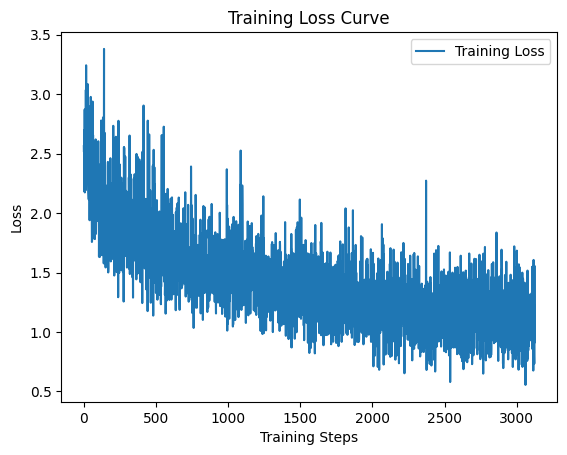

In [167]:
import lightning as L

# Define the LightningModule
class LitModel(L.LightningModule):
    def __init__(self, model, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.training_loss_history = []  # Store loss values

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.criterion(outputs, labels)

        # Log loss for visualization
        self.log("train_loss", loss, prog_bar=True, on_epoch=True, on_step=True)

        # Store loss in history (needed for manual plotting)
        self.training_loss_history.append(loss.item())

        return loss

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.01, momentum=0.9)

# Load dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Define model
net = torchvision.models.resnet18(num_classes=10)  # Example model
criterion = nn.CrossEntropyLoss()

# Wrap the model in Lightning
lit_model = LitModel(net, criterion)

# Train using PyTorch Lightning Trainer
trainer = L.Trainer(max_epochs=2)
trainer.fit(lit_model, trainloader)

# Plot loss curve
plt.plot(lit_model.training_loss_history, label="Training Loss", linestyle="-")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

## Tensorboard
TensorBoard is a visualization toolkit for tracking and analyzing deep learning experiments. It can log:
* Training loss curves
* Validation accuracy over epochs
* Model graphs
* Histograms of weights & gradients
* Images, embeddings, and more

We can log our model training as follows:

In [169]:
import lightning.pytorch as pl 
logger = pl.loggers.TensorBoardLogger("logs/", name="my_experiment")
trainer = pl.Trainer(max_epochs=2, logger=logger)
trainer.fit(lit_model, trainloader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Normally, you would open tensorboard from the command line with 
```
tensorboard --logdir logs
```

But we can also integrate it here using some magic:

In [171]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 76731), started 0:02:19 ago. (Use '!kill 76731' to kill it.)

TODO:
* More on drawing learning curves
* Regularization (Early stopping, L1/L2, Dropout, Batchnorm)